Transfer learning enables us to leverage the knowledge gained from pre-trained models and apply it to new tasks or domains, saving valuable computation time and resources. Previously, training deep learning models from scratch on large datasets was a time-consuming and computationally expensive process. However, with transfer learning, we can utilize the knowledge learned by pre-trained models on extensive datasets, which significantly reduces the training time and computational requirements for new tasks.





In [4]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
Img_Shape = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=Img_Shape+(3,))
])

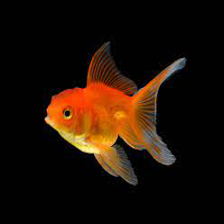

In [6]:
gold_fish = Image.open("/content/drive/MyDrive/Colab Notebooks/Goldfish.jpeg").resize(Img_Shape)
gold_fish

In [7]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         ...,
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]],

        ...,

        [[0.00392157, 0.00392157, 0.00392157],
         [0.00392157, 0.00392157, 0.00392157]

In [9]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [11]:

image_labels = []
with open("/content/drive/MyDrive/Colab Notebooks/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:10]

['background',
 'tench',
 'goldfish',
 'great white shark',
 'tiger shark',
 'hammerhead',
 'electric ray',
 'stingray',
 'cock',
 'hen']

In [12]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [13]:
image_labels[predicted_label_index]

'goldfish'

As can be noticed, we can make predictions using ready made model (without any training).